# Practice session 6: section 7

# Background

A system of ordinary differential equation of biological interest are the Lotka-Volterra equations, which describe the joint behavior of two species, one of which is a predator of the other. They form a system of two differential equations:

$$\frac{dx}{dt} = ax - bxy $$

$$\frac{dy}{dt} = -cy + dxy $$

where:

* x = prey
* y = predator
* a = the prey growth rate
* c = the predator death rate
* b and d = the rate effect of the predator-prey interaction on prey death and predator growth

Systems like these show a cyclic behavior.

# Problem

## Background

A team of biologists is experimenting with building an enclosed ecosystem for food production in a future Mars colony. They have started by building a closed system with just two species: grasses and goats.

You have been tasked with modelling the evolution of the population. For our purposes, the grasses will be the prey and the goats will be the predators. You need to simulate the evolution of the population and get realistic results.

Since the final ecosystem will have tens of interrelated species and they have to design many different combinations of possible species, the performance of the simulation is important. You will need to implement different methods and compare their results and performance. We will extend the methods we have learned in class to systems of equations. Then we will compare their results



## Data

We will start with $a=1.2$, $b=0.6$, $c=0.8$, and $d=0.3$.

## Tasks

* Implement Euler's method for the above system of two equations. 
    * Start with $h=1x10^{-4}$, x=3, y=3, from t=0 to t=100.
    * Measure the time for $h=1x10^{-4}$, $h=1x10^{-3}$, $h=1x10^{-2}$, and $h=1x10^{-1}$. Don't take into account the plotting time.
    * Plot the behaviour over timefor x and y, for each of the values of h.
* Implement Heun's method for the above system of two equations. Be aware that you will have to make an intermediate estimation of x and y and the end of the interval in order to calulate the slope there.
    * Start with $h=1x10^{-4}$, x=3, y=3, from t=0 to t=100.
    * Measure the time for $h=1x10^{-4}$, $h=1x10^{-3}$, $h=1x10^{-2}$, and $h=1x10^{-1}$. Don't take into account the plotting time.
    * Plot the behaviour over timefor x and y, for each of the values of h.
    
* Explain your plots, and argue which method and parameter values you would use and why.    

## Solution

### Euler

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def dx(x, y, a = 1.2, b = .6): return a*x - b*x*y
def dy(x, y, c = 0.8, d = .3): return -c*y + d*x*y

def euler(dx=dx, dy=dy, x_0=3, y_0=3, t_0=0, tf=100, h=1e-4):
    ts = [t_0]
    xs = [x_0]
    ys = [y_0]   

    while ts[-1] < tf:
        this_x = xs[-1]
        this_y = ys[-1]

        slope_x = dx(this_x, this_y)
        slope_y = dy(this_x, this_y)

        xs.append(this_x + slope_x * h)
        ys.append(this_y + slope_y * h)
        ts.append(ts[-1] + h)
    
    return xs, ys, ts

In [2]:
%%time

xs, ys, ts = euler(dx, dy)

CPU times: user 900 ms, sys: 19.6 ms, total: 919 ms
Wall time: 918 ms


In [3]:
%%time

xs_1, ys_1, ts_1 = euler(dx, dy, h=1e-3)

CPU times: user 109 ms, sys: 16.1 ms, total: 125 ms
Wall time: 124 ms


In [4]:
%%time

xs_2, ys_2, ts_2 = euler(dx, dy, h=1e-2)

CPU times: user 14.9 ms, sys: 0 ns, total: 14.9 ms
Wall time: 14.7 ms


In [5]:
%%time

xs_3, ys_3, ts_3 = euler(dx, dy, h=1e-1)

CPU times: user 1.32 ms, sys: 0 ns, total: 1.32 ms
Wall time: 1.32 ms


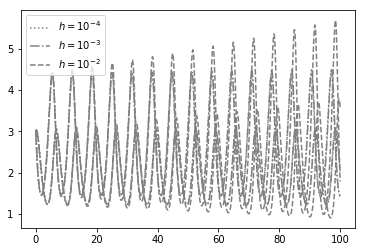

In [6]:
plt.plot(ts, xs, c='grey', linestyle=':', label='$h=10^{-4}$')
plt.plot(ts, ys, c='grey', linestyle=':')

plt.plot(ts_1, xs_1, c='grey', linestyle='-.', label='$h=10^{-3}$')
plt.plot(ts_1, ys_1, c='grey', linestyle='-.')

plt.plot(ts_2, xs_2, c='grey', linestyle='--', label='$h=10^{-2}$')
plt.plot(ts_2, ys_2, c='grey', linestyle='--')

plt.legend();

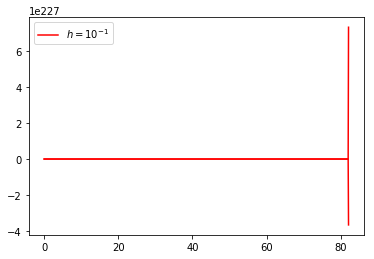

In [7]:
plt.plot(ts_3, xs_3, label='$h=10^{-1}$', c='red', linestyle='-')
plt.plot(ts_3, ys_3, c='red', linestyle='-')

plt.legend();

### Heun's method


In [8]:
def heun(dx=dx, dy=dy, x_0=3, y_0=3, t_0=0, tf=100, h=1e-4):
    ts = [t_0]
    xs = [x_0]
    ys = [x_0]

    while ts[-1] < tf:
        this_x = xs[-1]
        this_y = ys[-1]

        slope_x0 = dx(this_x, this_y)
        slope_y0 = dy(this_x, this_y)

        # Temporary
        endpoint_x = this_x + slope_x0 * h
        endpoint_y = this_y + slope_y0 * h

        endpoint_slope_x = dx(endpoint_x, endpoint_y)
        endpoint_slope_y = dy(endpoint_x, endpoint_y)

        endpoint_x = this_x + (slope_x0 + endpoint_slope_x)/2 * h
        endpoint_y = this_y + (slope_y0 + endpoint_slope_y)/2 * h

        xs.append(endpoint_x)
        ys.append(endpoint_y)
        ts.append(ts[-1] + h)
    
    return xs, ys, ts

In [9]:
%%time

xs, ys, ts = heun(dx, dy)

CPU times: user 1.53 s, sys: 52 ms, total: 1.58 s
Wall time: 1.58 s


In [10]:
%%time

xs_1, ys_1, ts_1 = heun(dx, dy, h=1e-3)

CPU times: user 203 ms, sys: 12 ms, total: 215 ms
Wall time: 212 ms


In [11]:
%%time

xs_2, ys_2, ts_2 = heun(dx, dy, h=1e-2)

CPU times: user 28.3 ms, sys: 86 µs, total: 28.4 ms
Wall time: 26.7 ms


In [12]:
%%time

xs_3, ys_3, ts_3 = heun(dx, dy, h=1e-1)

CPU times: user 5.43 ms, sys: 0 ns, total: 5.43 ms
Wall time: 5.32 ms


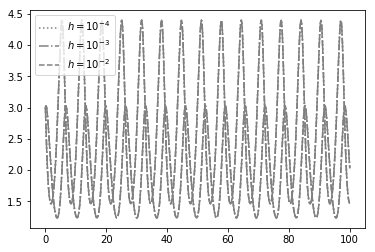

In [13]:
plt.plot(ts, xs, c='grey', linestyle=':', label='$h=10^{-4}$')
plt.plot(ts, ys, c='grey', linestyle=':')

plt.plot(ts_1, xs_1, c='grey', linestyle='-.', label='$h=10^{-3}$')
plt.plot(ts_1, ys_1, c='grey', linestyle='-.')

plt.plot(ts_2, xs_2, c='grey', linestyle='--', label='$h=10^{-2}$')
plt.plot(ts_2, ys_2, c='grey', linestyle='--')

plt.legend();

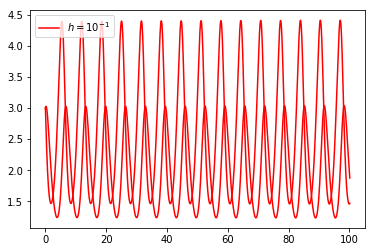

In [14]:
plt.plot(ts_3, xs_3, label='$h=10^{-1}$', c='red', linestyle='-')
plt.plot(ts_3, ys_3, c='red', linestyle='-')

plt.legend();

### Conclusion: 

Heun's method seems clearly superior. Even with the biggest value of h, it retains stability: the amplitudes don't change from une cycle to the other, and with that big h it is a lot faster.